In [4]:
from To_sim.for_multi import get_r_sigma_Z_D,get_r_sigma_Z_MF_D
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# MF Graph

In [2]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,1.1
db = 0.05
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,2+db/2,db)

In [26]:
B_R,B_S,B_C = [],[],[]
for seed in tqdm(range(100)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_rs = []
    B_sigmas = []
    B_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z_MF_D,Ds,theta_random,t,b,omega,N,K,pm_pbar=False, pm_processes=10):
        B_rs.append(r_m)
        B_sigmas.append(sigma)
        B_chis.append(chi)
    B_R.append(B_rs)
    B_S.append(B_sigmas)
    B_C.append(B_chis)

  0%|          | 0/100 [00:00<?, ?it/s]

In [27]:
BRM = np.mean(B_R,axis=0)
BSM = np.mean(B_S,axis=0)
BCM = np.mean(B_C,axis=0)

BRS = np.std(B_R,axis=0)
BSS = np.std(B_S,axis=0)
BCS = np.std(B_C,axis=0)

In [28]:
np.savez(f'DATA/MF_ENSEMBLE dt = {dt} b = {b}',BRM=BRM,BSM=BSM,BCM=BCM,BRS=BRS,BSS=BSS,BCS=BCS,b=b,Ds=Ds,dt=dt)
np.savez(f'DATA/MF_ENSEMBLE_N dt = {dt} b = {b}',BR=B_R,BS=B_S,BC=B_C,b=b,Ds=Ds,dt=dt)


<ErrorbarContainer object of 3 artists>

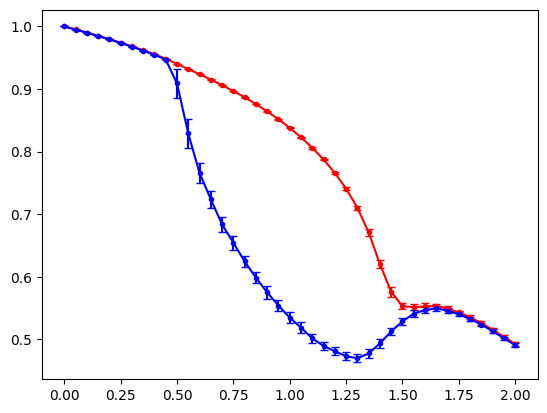

In [29]:
plt.errorbar(Ds,BRM,BRS,capsize=3,fmt='.-',color='red')
plt.errorbar(Ds,BSM,BSS,capsize=3,fmt='.-',color='blue')
# plt.errorbar(Ds,BRM,BRC)

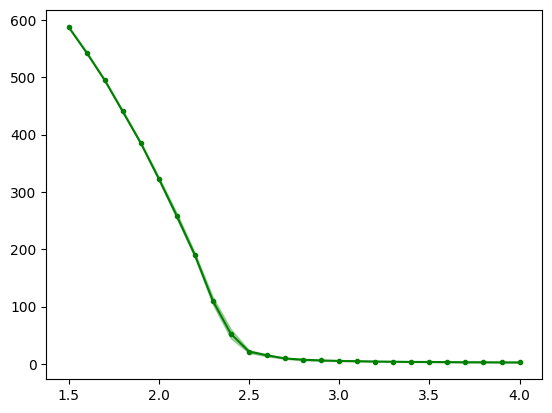

In [148]:
plt.plot(Ds,BCM,'g.-')
plt.fill_between(Ds,BCM-BCS,BCM+BCS,alpha=0.3,color='green')

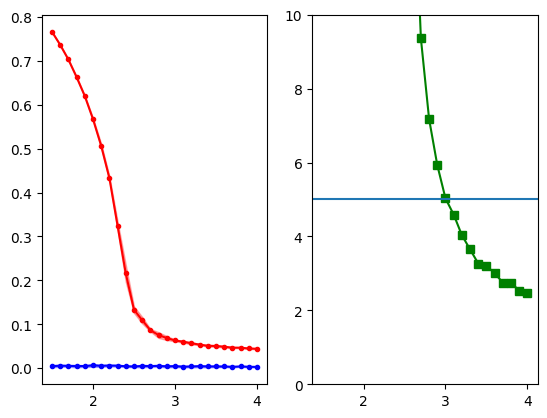

In [149]:
plt.subplot(121)
plt.plot(Ds,BRM,'r.-')
plt.fill_between(Ds,BRM-BRS,BRM+BRS,color='red',alpha=0.3)
plt.plot(Ds,BSM,'b.-')
plt.fill_between(Ds,BSM-BSS,BSM+BSS,color='blue',alpha=0.3)

plt.subplot(122)
plt.plot(Ds,BCM,'gs-')
plt.ylim(0,10)
plt.axhline(5)

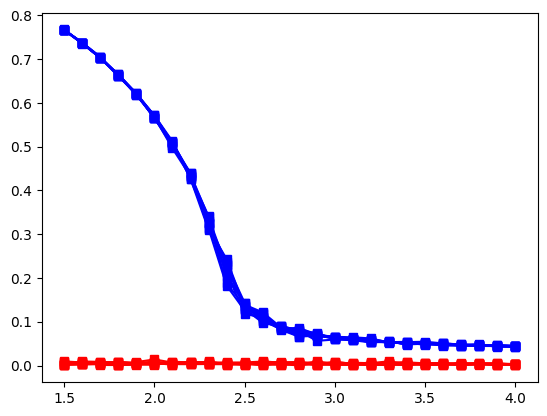

In [150]:
for i in range(10):
    B_rs = B_R[i]
    B_sigmas = B_S[i]
    plt.plot(Ds,B_rs,'bs-')
    plt.plot(Ds,B_sigmas,'rs-')

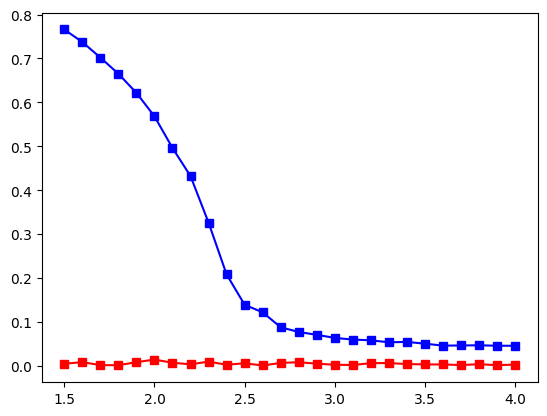

In [145]:
plt.plot(Ds,B_rs,'bs-')
plt.plot(Ds,B_sigmas,'rs-')

# DATA LOAD

In [76]:
AR_MF = np.load('DATA/MF N = 1000 db=0.04 K = 5 000.npz')
AR_ER = np.load('DATA/ER N = 1000 mk = 6.0 db=0.04 K = 5 000.npz')
AR_SF = np.load('DATA/SF N = 1000 m = 3 db=0.04 000.npz')

# ER network load

In [30]:
N_ER = pickle.load(open('DATA/ER GRAPH/ER.pickle','rb'))

In [31]:
N_KEY = set()
for i,j in N_ER.keys():
    N_KEY.add(j)
print(N_KEY)

{'Aij', 'D', 'mk', 'G'}


In [32]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)

db = 0.05
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)

In [ ]:
B_R,B_S,B_C = [],[],[]
BN_R,BN_S,BN_C = [],[],[]
for seed in tqdm(range(50)):
    Rs,Ss,Cs = [],[],[]
    for i in range(50):
        B_rs = []
        B_sigmas = []    
        B_chis = []
        for r_m,sigma,chi in parmap.map(get_r_sigma_Z_D,Ds,theta_random,t,b,omega,N,K,N_ER[seed,'mk'],N_ER[seed,'Aij'],pm_pbar=True, pm_processes=10):
            B_rs.append(r_m)
            B_sigmas.append(sigma)
            B_chis.append(chi)

        B_R.append(B_rs)
        B_S.append(B_sigmas)
        B_C.append(B_chis)
        Rs.append(B_rs)
        Ss.append(B_sigmas)
        Cs.append(B_chis)
    BN_R.append(Rs)
    BN_S.append(Ss)
    BN_C.append(Cs)

In [34]:
BRM = np.mean(B_R,axis=0)
BSM = np.mean(B_S,axis=0)
BCM = np.mean(B_C,axis=0)

BRS = np.std(B_R,axis=0)
BSS = np.std(B_S,axis=0)
BCS = np.std(B_C,axis=0)

<ErrorbarContainer object of 3 artists>

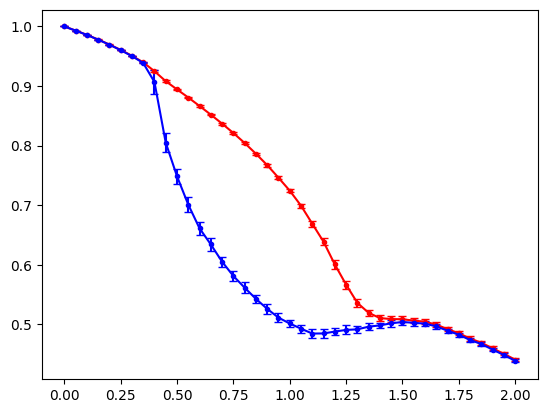

In [35]:
plt.errorbar(Ds,BRM,BRS,capsize=3,fmt='.-',color='red')
plt.errorbar(Ds,BSM,BSS,capsize=3,fmt='.-',color='blue')

In [36]:
np.savez(f'DATA/ER_ENSEMBLE dt = {dt} b = {b}',BRM=BRM,BSM=BSM,BCM=BCM,BRS=BRS,BSS=BSS,BCS=BCS,b=b,Ds=Ds,dt=dt)
np.savez(f'DATA/ER_ENSEMBLE_N dt = {dt} b = {b}',BR=BN_R,BS=BN_S,BC=BN_C,b=b,Ds=Ds,dt=dt)

# SF Network

In [111]:
# m = 3
# GSF = nx.barabasi_albert_graph(N,m,seed=0)
# A = nx.adjacency_matrix(GSF)
# Aij_SF = np.array(A.todense())
# Deg = Aij_SF.sum(axis=1)
# DegT = Deg.reshape(-1,1)
# mk_SF = Deg.mean()
# print(mk_SF)

5.982


In [3]:
N_SF = pickle.load(open('DATA/SF GRAPH/SF.pickle','rb'))

In [ ]:
B_R,B_S,B_C = [],[],[]
BN_R,BN_S,BN_C = [],[],[]
for seed in tqdm(range(50)):
    Rs,Ss,Cs = [],[],[]
    for i in range(50):
        B_rs = []
        B_sigmas = []    
        B_chis = []
        for r_m,sigma,chi in parmap.map(get_r_sigma_Z_D,Ds,theta_random,t,b,omega,N,K,N_SF[seed,'mk'],N_SF[seed,'Aij'],pm_pbar=True, pm_processes=15):
            B_rs.append(r_m)
            B_sigmas.append(sigma)
            B_chis.append(chi)

        B_R.append(B_rs)
        B_S.append(B_sigmas)
        B_C.append(B_chis)
        Rs.append(B_rs)
        Ss.append(B_sigmas)
        Cs.append(B_chis)
    BN_R.append(Rs)
    BN_S.append(Ss)
    BN_C.append(Cs)

In [5]:
BRM = np.mean(B_R,axis=0)
BSM = np.mean(B_S,axis=0)
BCM = np.mean(B_C,axis=0)

BRS = np.std(B_R,axis=0)
BSS = np.std(B_S,axis=0)
BCS = np.std(B_C,axis=0)

<ErrorbarContainer object of 3 artists>

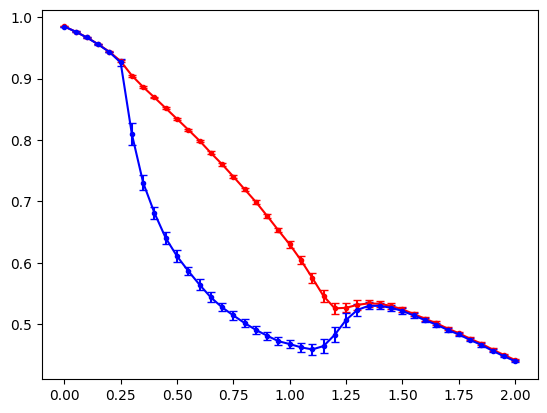

In [6]:
plt.errorbar(Ds,BRM,BRS,capsize=3,fmt='.-',color='red')
plt.errorbar(Ds,BSM,BSS,capsize=3,fmt='.-',color='blue')

In [7]:
np.savez(f'DATA/SF_ENSEMBLE dt = {dt} b = {b} 0',BRM=BRM,BSM=BSM,BCM=BCM,BRS=BRS,BSS=BSS,BCS=BCS,b=b,Ds=Ds,dt=dt)
np.savez(f'DATA/SF_ENSEMBLE_N dt = {dt} b = {b} 0',BR=BN_R,BS=BN_S,BC=BN_C,b=b,Ds=Ds,dt=dt)

## Graph

In [2]:
import glob

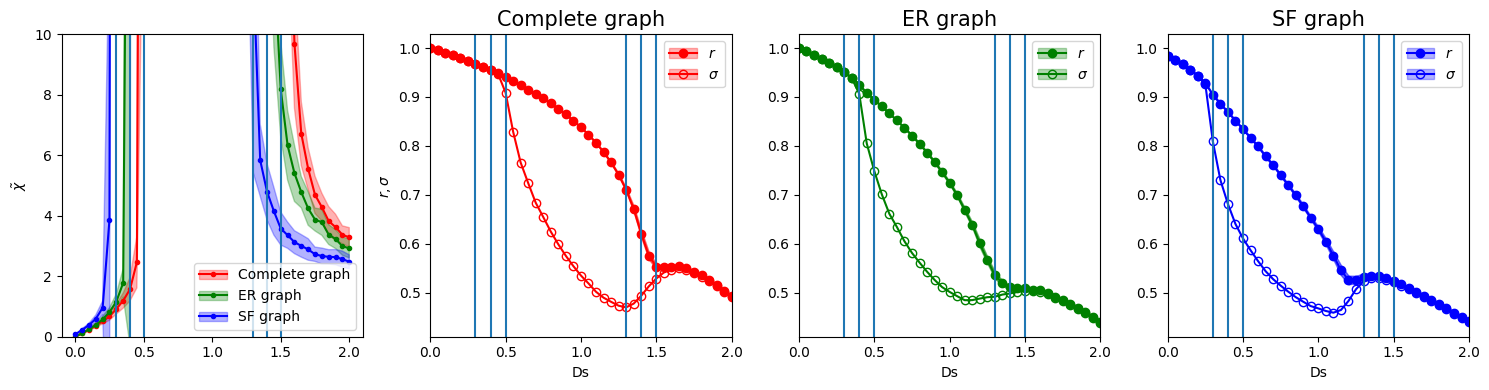

In [57]:
A = glob.glob('DATA/*_ENSEMBLE dt = 0.1 b = 1.1 0.npz')
plt.figure(figsize=(15,4))
NN = ['MF','ER','SF']

Name = {'MF':['Complete graph','red'],'ER':['ER graph','green'],'SF':['SF graph','blue']}
num = 142
leg = []
leg_name = []
for net in NN:
    plt.subplot(141)

    for name in A:
        temp = np.load(name)
        name = name.split('/')[1].split('_')[0]
        if net ==  name:
            p, = plt.plot(temp['Ds'],temp['BCM'],'.-',label=Name[net][0],color=Name[net][1])
            f = plt.fill_between(temp['Ds'],temp['BCM']-temp['BCS'],temp['BCM']+temp['BCS'],color=Name[net][1],alpha=0.3)
            leg.append((p,f))
            leg_name.append(Name[net][0])
            
    for name in A:
        temp = np.load(name)
        name = name.split('/')[1].split('_')[0]
        if net ==  name:
            if num == 142:
                ax2 = plt.subplot(num)
            else:
                plt.subplot(num,sharey=ax2)
            plt.title(Name[net][0],fontsize=15)
            rp, = plt.plot(temp['Ds'],temp['BRM'],'o-',color=Name[net][1],label=r'$r$')
            rf  = plt.fill_between(temp['Ds'],temp['BRM']-temp['BRS'],temp['BRM']+temp['BRS'],color=Name[net][1],alpha=0.3)
            sp, = plt.plot(temp['Ds'],temp['BSM'],'o-',fillstyle='none',c=Name[net][1],label=r'$\sigma$')
            sf  = plt.fill_between(temp['Ds'],temp['BRM']-temp['BRS'],temp['BRM']+temp['BRS'],color=Name[net][1],alpha=0.3)
            plt.legend([(rp,rf),(sp,sf)],[r'$r$',r'$\sigma$'])
            # plt.ylim(0,1)
            plt.xlim(0,2.0)
            plt.xlabel('Ds')
            plt.axvline(0.3)
            plt.axvline(0.4)
            plt.axvline(0.5)

            plt.axvline(1.3)
            plt.axvline(1.4)
            plt.axvline(1.5)

            num += 1
# plt.subplot(142)
plt.sca(ax2)
plt.ylabel(r'$r,\sigma$')

plt.subplot(141)
plt.legend(leg,leg_name)
plt.ylabel(r'$\tilde{\chi}$')
plt.ylim(0,10)

plt.axvline(0.3)
plt.axvline(0.4)
plt.axvline(0.5)

plt.axvline(1.3)
plt.axvline(1.4)
plt.axvline(1.5)

b = temp['b']
# plt.suptitle(f'b = {b}')
plt.tight_layout()

In [386]:
leg

[(<matplotlib.lines.Line2D at 0x176631d90>,
  <matplotlib.collections.PolyCollection at 0x32426d6d0>),
 (<matplotlib.lines.Line2D at 0x17663d090>,
  <matplotlib.collections.PolyCollection at 0x17663c810>),
 (<matplotlib.lines.Line2D at 0x316f7e310>,
  <matplotlib.collections.PolyCollection at 0x316f7f450>)]

# Graph

In [34]:
from To_sim.for_multi import get_sol,get_sol_MF
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from To_sim.Utility import get_ER,get_SF

In [32]:
N = 1000

In [35]:
# N_ER = {}
# N_SF = {}
# GER,Aij_ER,Deg_ER,mk_ER = get_ER(N,mk=6)
# GSF,Aij_SF,Deg_SF,mk_SF = get_SF(N,m =3)
# for i in tqdm(range(1,50)):
#     N_ER[i,'G'],N_ER[i,'Aij'],N_ER[i,'D'],N_ER[i,'mk'] = get_ER(N,mk=6)
# for i in range(1,50):
#     N_SF[i,'G'],N_SF[i,'Aij'],N_SF[i,'D'],N_SF[i,'mk'] = get_SF(N,m=3)

In [45]:
N_ER = pickle.load(open('DATA/ER GRAPH/ER.pickle','rb'))
GER = N_ER[0,'G'] 
Aij_ER = N_ER[0,'Aij'] 
Deg_ER = N_ER[0,'D'] 
mk_ER = N_ER[0,'mk'] 

In [46]:
N_SF = pickle.load(open('DATA/SF GRAPH/SF.pickle','rb'))
GSF = N_SF[0,'G'] 
Aij_SF = N_SF[0,'Aij'] 
Deg_SF = N_SF[0,'D'] 
mk_SF = N_SF[0,'mk'] 

In [47]:
MF = {}
ER = {}
SF = {}

In [48]:
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega,K = 1,5
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)

b = 1.1

In [ ]:
plt.axvline(0.3)
plt.axvline(0.4)
plt.axvline(0.5)

plt.axvline(1.35)
plt.axvline(1.5)
plt.axvline(1.6)

In [49]:
Ds = [0.3,0.4,0.5,1.4,1.5,1.6]


In [ ]:
theta_s_MF,rabs_MF,chi_MF,sigma_MF = get_sol_MF(theta_random,t,D,b,omega,N,K)
r_MF = np.abs(rabs_MF)

theta_s_ER,rabs_ER,chi_ER,sigma_ER = get_sol(theta_random,t,D,b,omega,N,K,mk_ER,Aij_ER)
r_ER = np.abs(rabs_ER)

theta_s_SF,rabs_SF,chi_SF,sigma_SF = get_sol(theta_random,t,D,b,omega,N,K,mk_SF,Aij_SF)
r_SF = np.abs(rabs_SF)

In [50]:
D = 1.4
MF[b,D,'T'],MF[b,D,'RA'],MF[b,D,'C'],MF[b,D,'S'] = get_sol_MF(theta_random,t,D,b,omega,N,K)
MF[b,D,'R'] = np.abs(MF[b,D,'RA'])
ER[b,D,'T'],ER[b,D,'RA'],ER[b,D,'C'],ER[b,D,'S'] = get_sol(theta_random,t,D,b,omega,N,K,mk_ER,Aij_ER)
ER[b,D,'R'] = np.abs(ER[b,D,'RA'])
SF[b,D,'T'],SF[b,D,'RA'],SF[b,D,'C'],SF[b,D,'S'] = get_sol(theta_random,t,D,b,omega,N,K,mk_SF,Aij_SF)
SF[b,D,'R'] = np.abs(SF[b,D,'RA'])

In [446]:
pickle.dump(MF, open('Data/MF.pickle', 'wb'))
pickle.dump(SF, open('Data/SF.pickle', 'wb'))
pickle.dump(ER, open('Data/ER.pickle', 'wb'))

In [287]:
for D in tqdm(Ds):
    MF[b,D,'T'],MF[b,D,'RA'],MF[b,D,'C'],MF[b,D,'S'] = get_sol_MF(theta_random,t,D,b,omega,N,K)
    MF[b,D,'R'] = np.abs(MF[b,D,'RA'])
    ER[b,D,'T'],ER[b,D,'RA'],ER[b,D,'C'],ER[b,D,'S'] = get_sol(theta_random,t,D,b,omega,N,K,mk_ER,Aij_ER)
    ER[b,D,'R'] = np.abs(ER[b,D,'RA'])
    SF[b,D,'T'],SF[b,D,'RA'],SF[b,D,'C'],SF[b,D,'S'] = get_sol(theta_random,t,D,b,omega,N,K,mk_SF,Aij_SF)
    SF[b,D,'R'] = np.abs(SF[b,D,'RA'])

  0%|          | 0/6 [00:00<?, ?it/s]

Text(0.5, 1.0, '$b=1.1,D=1.4$')

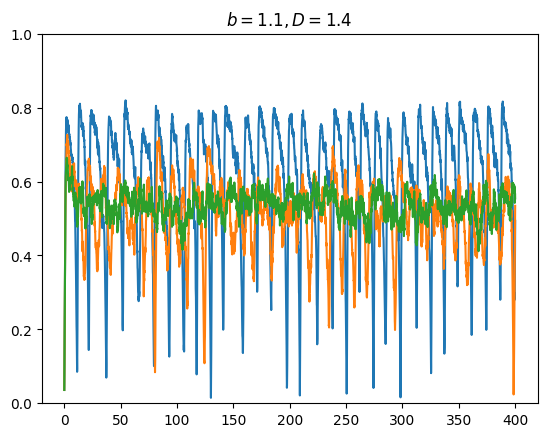

In [51]:

plt.plot(t,MF[b,D,'R'])
plt.plot(t,ER[b,D,'R'])
plt.plot(t,SF[b,D,'R'])
plt.ylim(0,1)
plt.title(fr'$b={b},D={D}$')

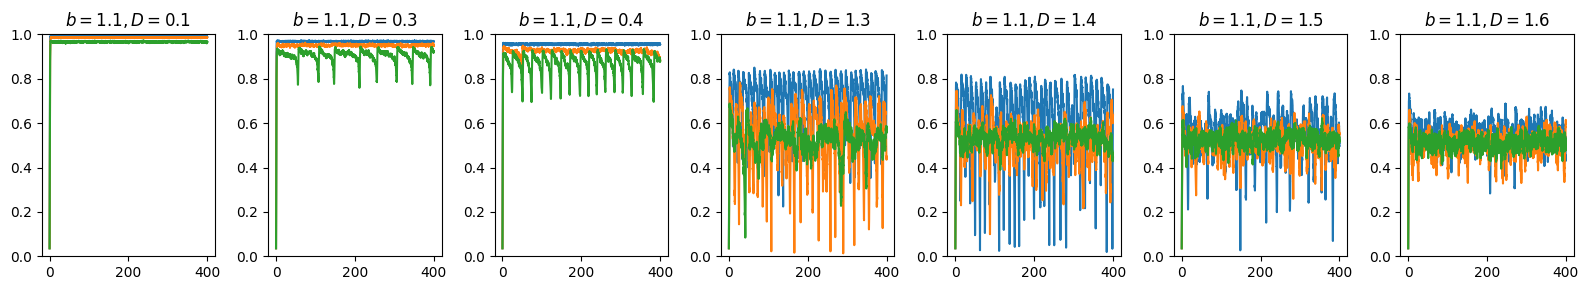

In [346]:
num = 171
plt.figure(figsize=(16,3))
for D in Ds:
    plt.subplot(num)
    plt.plot(t,MF[b,D,'R'])
    plt.plot(t,ER[b,D,'R'])
    plt.plot(t,SF[b,D,'R'])
    plt.ylim(0,1)
    plt.title(fr'$b={b},D={D}$')
    num +=1
plt.tight_layout()

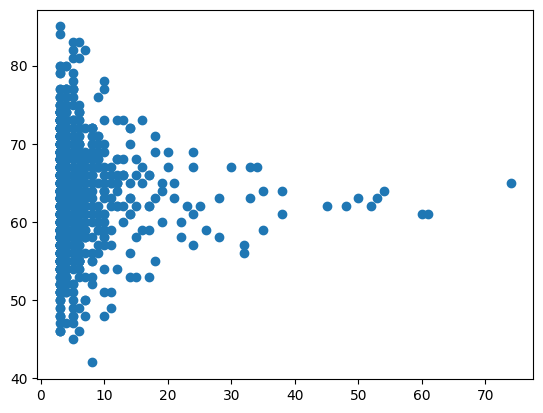

In [295]:
SF_Darg = np.argsort(Deg_SF)[::-1]
SF_SDEG = np.sort(Deg_SF)[::-1]
plt.scatter(SF_SDEG,theta_s_SF[-1,SF_Darg[SF_Darg]]//(2*np.pi))

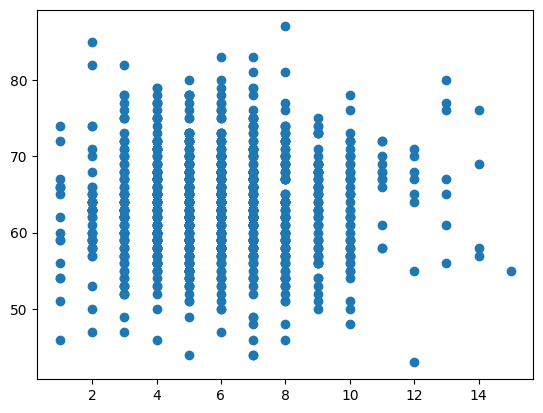

In [296]:
ER_Darg = np.argsort(Deg_ER)[::-1]
ER_SDEG = np.sort(Deg_ER)[::-1]
plt.scatter(ER_SDEG,theta_s_ER[-1,ER_Darg[ER_Darg]]//(2*np.pi))

In [423]:
A = nx.adjacency_matrix(temp_GER)
temp_Aij_ER = np.array(A.todense())
temp_Deg_ER = temp_Aij_ER.sum(axis=1)
temp_mk_ER = temp_Deg_ER.mean()

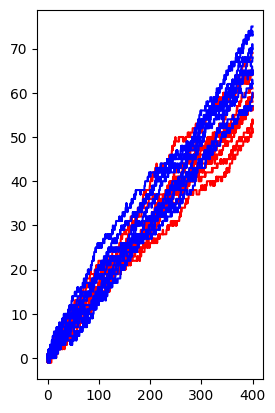

In [297]:
plt.subplot(121)

plt.plot(t,(theta_s_ER[::,ER_Darg[:10]]//(2*np.pi)),color='red');
plt.plot(t,(theta_s_ER[::,ER_Darg[-10:]]//(2*np.pi)),color='blue');


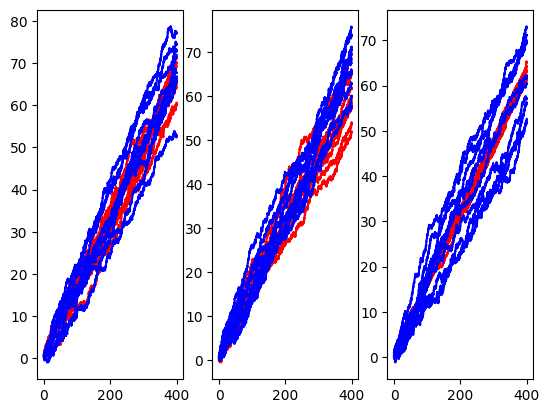

In [298]:
plt.subplot(131)

plt.plot(t,(theta_s_MF[::,:10]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_MF[::,-10:]/(2*np.pi)),color='blue');

plt.subplot(132)

plt.plot(t,(theta_s_ER[::,ER_Darg[:10]]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_ER[::,ER_Darg[-10:]]/(2*np.pi)),color='blue');


plt.subplot(133)

plt.plot(t,(theta_s_SF[::,SF_Darg[:10]]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_SF[::,SF_Darg[-10:]]/(2*np.pi)),color='blue');

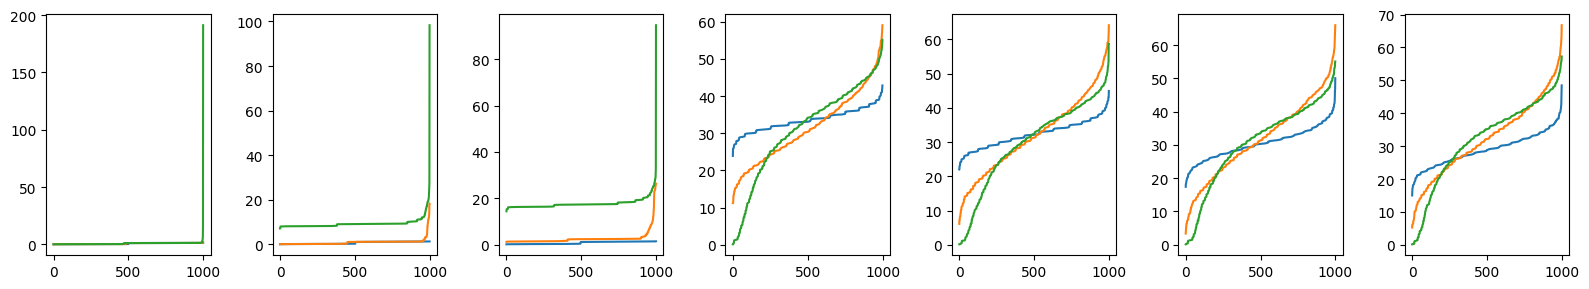

In [347]:
num = 171
plt.figure(figsize=(16,3))
for D in Ds:
    plt.subplot(num)
    A_MF = np.argsort((MF[b,D,'T'][-1]/(2*np.pi)))
    A_ER = np.argsort((ER[b,D,'T'][-1]/(2*np.pi)))
    A_SF = np.argsort((SF[b,D,'T'][-1]/(2*np.pi)))

    S_MF = np.sort((MF[b,D,'T'][-1]/(2*np.pi)))
    S_ER = np.sort((ER[b,D,'T'][-1]/(2*np.pi)))
    S_SF = np.sort((SF[b,D,'T'][-1]/(2*np.pi)))

    plt.plot(S_MF)
    plt.plot(S_ER)
    plt.plot(S_SF)
    num +=1
plt.tight_layout()

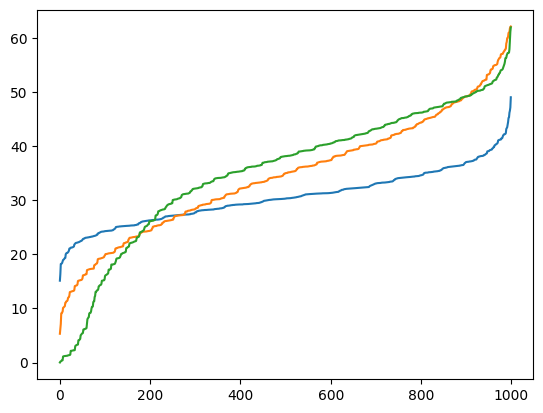

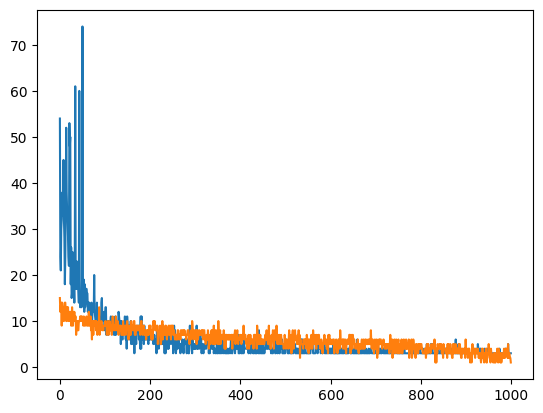

In [307]:
# plt.plot([A_MF])
plt.plot(Deg_SF[A_SF])
plt.plot(Deg_ER[A_ER])

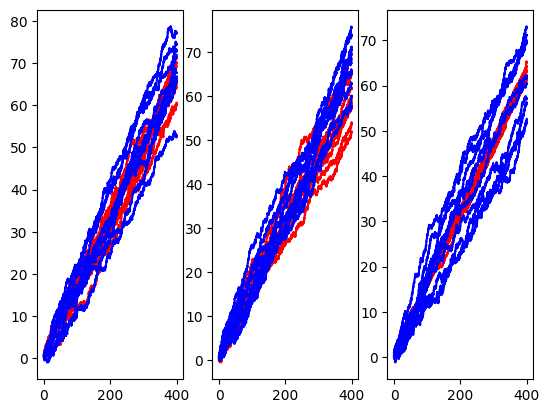

In [268]:
plt.subplot(131)

plt.plot(t,(theta_s_MF[::,:10]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_MF[::,-10:]/(2*np.pi)),color='blue');

plt.subplot(132)

plt.plot(t,(theta_s_ER[::,ER_Darg[:10]]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_ER[::,ER_Darg[-10:]]/(2*np.pi)),color='blue');


plt.subplot(133)

plt.plot(t,(theta_s_SF[::,SF_Darg[:10]]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_SF[::,SF_Darg[-10:]]/(2*np.pi)),color='blue');

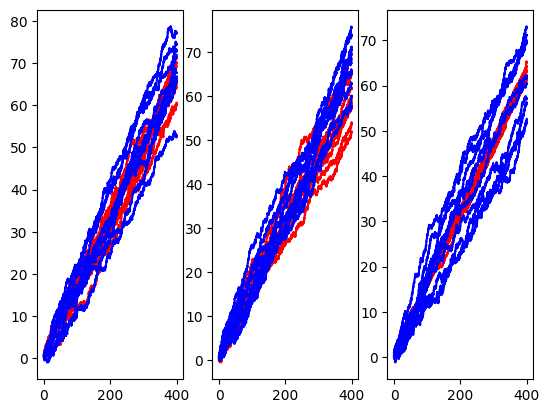

In [269]:
plt.subplot(131)

plt.plot(t,(theta_s_MF[::,:10]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_MF[::,-10:]/(2*np.pi)),color='blue');

plt.subplot(132)

plt.plot(t,(theta_s_ER[::,ER_Darg[:10]]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_ER[::,ER_Darg[-10:]]/(2*np.pi)),color='blue');


plt.subplot(133)

plt.plot(t,(theta_s_SF[::,SF_Darg[:10]]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_SF[::,SF_Darg[-10:]]/(2*np.pi)),color='blue');

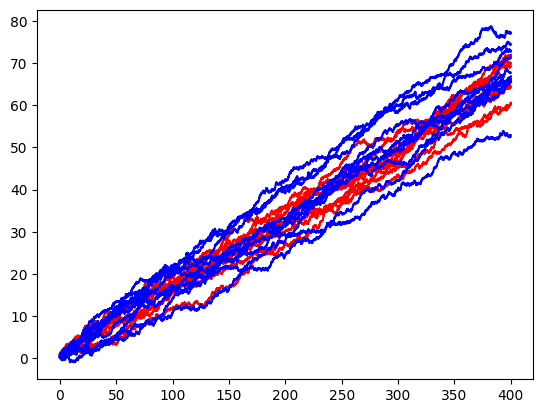

In [270]:
plt.plot(t,(theta_s_MF[::,:10]/(2*np.pi)),color='red');
plt.plot(t,(theta_s_MF[::,-10:]/(2*np.pi)),color='blue');

In [271]:
H_SF = np.argsort(Deg_SF)[::-1][:50]
L_SF = np.argsort(Deg_SF)[::][:50]
HTH_SF =  theta_s_SF[:,H_SF]%(2*np.pi)
HSF_arg =  np.argsort(HTH_SF[-1])
HTH_SF = HTH_SF[:,HSF_arg]
LTH_SF =  theta_s_SF[:,L_SF]%(2*np.pi)
LSF_arg =  np.argsort(LTH_SF[-1])
LTH_SF = HTH_SF[:,LSF_arg]

In [272]:
H_ER = np.argsort(Deg_ER)[::-1][:50]
L_ER = np.argsort(Deg_ER)[::][:50]
HTH_ER =  theta_s_ER[:,H_ER]%(2*np.pi)
HER_arg =  np.argsort(HTH_ER[-1])
HTH_ER = HTH_ER[:,HER_arg]
LTH_ER =  theta_s_ER[:,L_ER]%(2*np.pi)
LER_arg =  np.argsort(LTH_ER[-1])
LTH_ER = HTH_ER[:,LER_arg]

In [273]:
LSF = len(np.c_[H_SF,L_SF])
SFTH = np.c_[HTH_SF,LTH_SF]

LER = len(np.c_[H_ER,L_ER])
ERTH = np.c_[HTH_ER,LTH_ER]

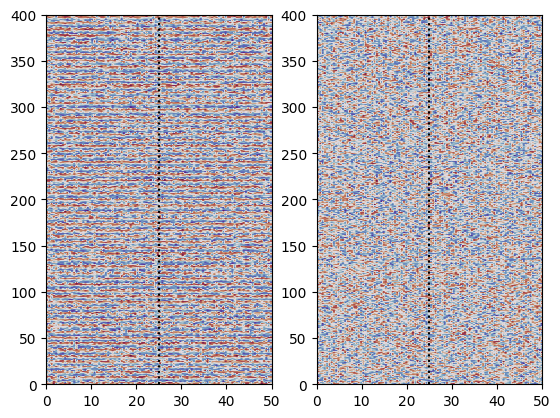

In [274]:
plt.subplot(121)
plt.imshow(SFTH,origin='lower',cmap='twilight_shifted',aspect='auto',extent=[0,LSF,t[0],t[-1]])
plt.axvline(LSF//2,color='black',ls=':')
plt.subplot(122)
plt.imshow(ERTH,origin='lower',cmap='twilight_shifted',aspect='auto',extent=[0,LER,t[0],t[-1]])
plt.axvline(LER//2,color='black',ls=':')



## Order parameter

In [52]:
h,b_ = np.histogram(np.linspace(-np.pi,np.pi),bins=200,density=True)
# h,b_ = np.histogram(A[len(t)//2,:],bins=100)

b = 1.1
D = 1.4
A = (ER[b,D,'T']+np.pi)%(2*np.pi)-np.pi
hs_ER = []
for E in A:
    h,_ = np.histogram(E,bins=b_,density=True)
    hs_ER.append(h)
hs_ER = np.array(hs_ER)

A = (MF[b,D,'T']+np.pi)%(2*np.pi)-np.pi
hs_MF = []
for E in A:
    h,_ = np.histogram(E,bins=b_,density=True)
    hs_MF.append(h)
hs_MF = np.array(hs_MF)

A = (SF[b,D,'T']+np.pi)%(2*np.pi)-np.pi
hs_SF = []
for E in A:
    h,_ = np.histogram(E,bins=b_,density=True)
    hs_SF.append(h)
hs_SF = np.array(hs_SF)

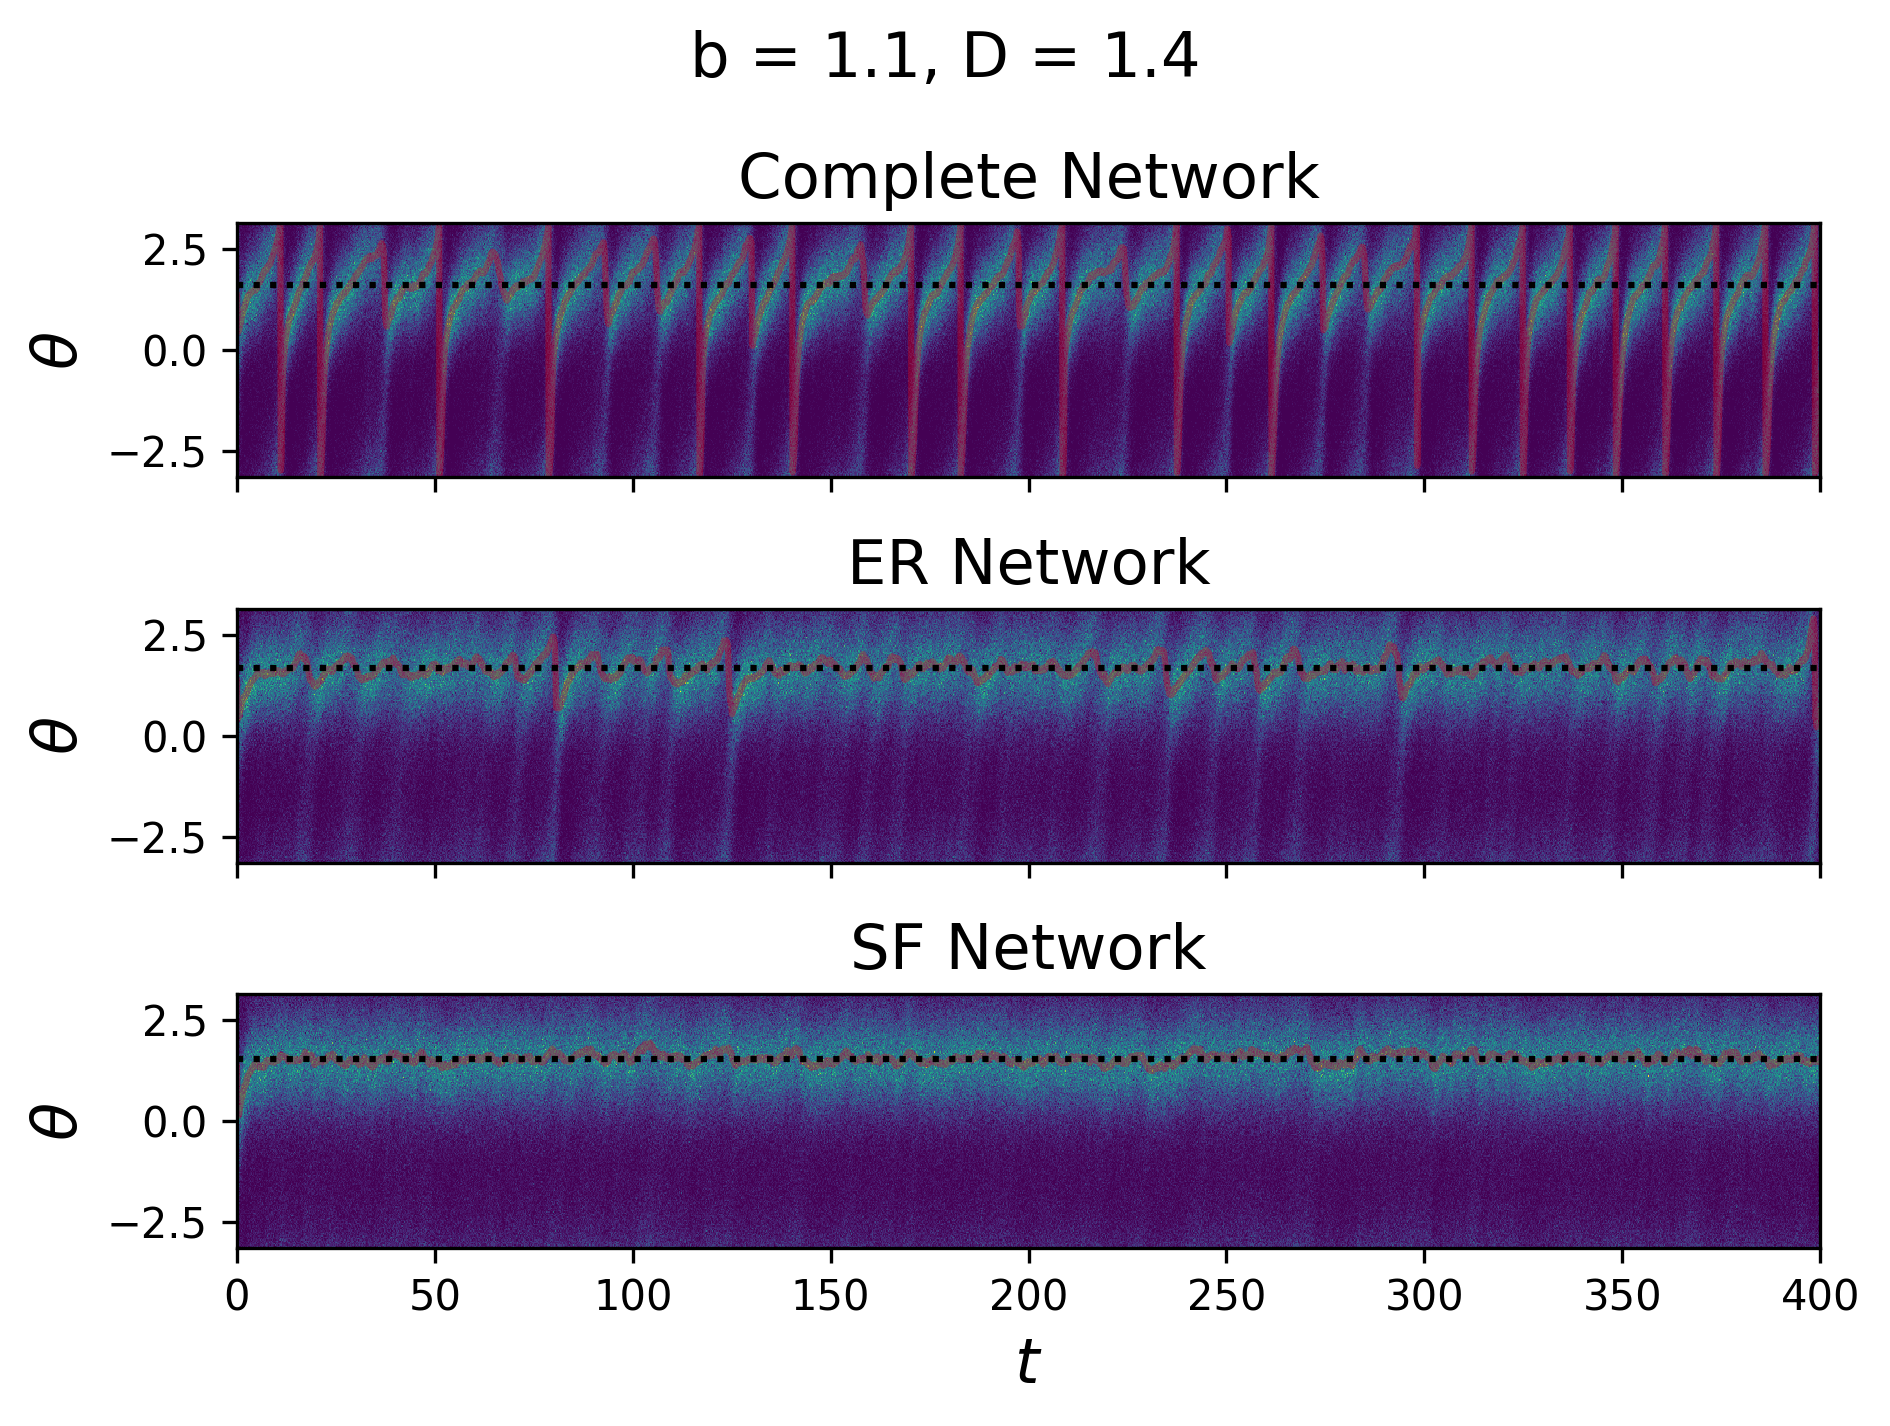

In [53]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,dpi = 300)
plt.sca(ax1)
plt.pcolormesh(t[:5000],b_,hs_MF[1:5000].T)
plt.plot(t[:5000],np.angle(MF[b,D,'RA'][:5000]),color='red',alpha=0.3)
plt.gca().set_aspect('auto')

# plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$\theta$',fontsize=15)
plt.axhline(np.angle(MF[b,D,'S']),color='black',ls=':')
plt.title('Complete Network',fontsize=15)
plt.ylim(-np.pi,np.pi)

plt.sca(ax2)


plt.pcolormesh(t[:5000],b_,hs_ER[1:5000].T)
plt.plot(t[:5000],np.angle(ER[b,D,'RA'][:5000]),color='red',alpha=0.3)
plt.gca().set_aspect('auto')
plt.axhline(np.angle(ER[b,D,'S']),color='black',ls=':')

plt.ylabel(r'$\theta$',fontsize=15)
plt.ylim(-np.pi,np.pi)
plt.title('ER Network',fontsize=15)


plt.sca(ax3)
plt.pcolormesh(t[:5000],b_,hs_SF[1:5000].T)
plt.plot(t[:5000],np.angle(SF[b,D,'RA'][:5000]),color='red',alpha=0.3)
plt.gca().set_aspect('auto')
plt.axhline(np.angle(SF[b,D,'S']),color='black',ls=':')

plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$\theta$',fontsize=15)
# plt.title(r'histogram of $\theta_i$',fontsize=15)
plt.ylim(-np.pi,np.pi)
plt.title('SF Network',fontsize=15)

plt.suptitle(rf'b = {b}, D = {D}',fontsize=15)
plt.tight_layout()



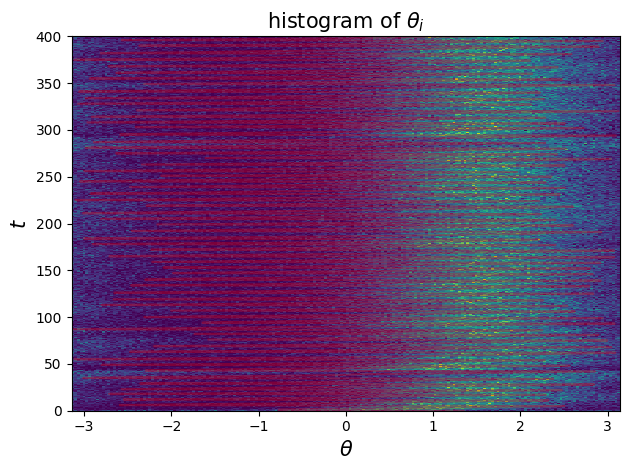

In [368]:
plt.pcolormesh(b_,t[::10],hs_SF[1::10])
plt.plot(np.angle(rabs_SF[::10]),t[::10],color='red',alpha=0.3)
# plt.axvline(np.angle(sigma_phi))
plt.gca().set_aspect('auto')
plt.ylabel(r'$t$',fontsize=15)
plt.xlabel(r'$\theta$',fontsize=15)
plt.title(r'histogram of $\theta_i$',fontsize=15)
plt.xlim(-np.pi,np.pi)
plt.tight_layout()
